In [1]:
from bunkatech.topic_modeling.nested import NestedTopicModeling
import pandas as pd

In [2]:
data = pd.read_csv(
    "/Users/charlesdedampierre/Desktop/ENS Projects/imaginary-world/db_film_iw (2).csv",
    index_col=[0],
)

data = data.sample(3000)

In [9]:

nested = NestedTopicModeling(data=data, text_var="description", index_var="imdb")

nested.fit(
    folding=[['love', 'couple', 'passion'], ['war', 'world', 'hate']],
    docs_embedding_model="tfidf",
    extract_terms=True,
    terms_embedding=False,
    sample_size_terms=500,
    terms_limit=500,
    terms_ents=False,
    terms_ngrams=(1, 2),
    terms_ncs=False,
    terms_include_pos=["NOUN", "PROPN", "ADJ"],
    terms_include_types=["PERSON", "ORG"],
    terms_embedding_model="distiluse-base-multilingual-cased-v1",
    language="en",
)



Extract Terms: 100%|█████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 97.55it/s]


UMAP(angular_rp_forest=True, metric='cosine', n_components=5, n_neighbors=10, verbose=True)
Tue Mar 15 18:34:48 2022 Construct fuzzy simplicial set
Tue Mar 15 18:34:48 2022 Finding Nearest Neighbors
Tue Mar 15 18:34:48 2022 Finished Nearest Neighbor Search
Tue Mar 15 18:34:48 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Tue Mar 15 18:34:52 2022 Finished embedding


Epochs completed:   0%|            0/100 [00:00]

ValueError: Length mismatch: Expected axis has 3007 elements, new values have 2991 elements

In [5]:
nested.docs_embeddings

,0,1,2,3,4
imdb,,,,,
tt4019560,2.094638,9.011682,9.607541,13.732236,8.955038
tt0105417,0.776280,9.756317,11.367807,13.699134,8.595756
tt0092263,2.874604,9.052836,9.864577,13.948632,8.932384
tt0083658,2.163598,7.205437,10.089458,14.680281,8.168141
tt2473510,1.808090,7.819321,9.884520,14.314617,7.808546
...,...,...,...,...,...
tt5254868,1.737591,8.091501,11.677968,14.883592,8.434553
tt1783232,1.920362,7.205516,10.636382,14.007144,9.736862
tt0406650,1.707443,8.177806,10.350312,16.831604,10.141684


In [23]:
test = nested.get_centroid_documents(nested_level=0, top_elements = 3)
test

,clusters,centroid_docs,farest_doc,cluster_radius
0,0,"Following the unexpected death of her father, ...","Australian Outback adventurer Mick ""Crocodile""...",2.770972
1,1,A mentally unstable veteran works as a nightti...,As Steve Rogers struggles to embrace his role ...,2.188053
2,2,Two neighbors have it out after one of them de...,A grand musical about three passionate and dre...,2.722968
3,3,With his wife's disappearance having become th...,"Jackie Moon, the owner-coach-player of the Ame...",2.838644
4,4,The story of former UVF member Alistair Little...,A man who serves in the war between the forces...,2.294639
5,5,After three British Agents are assigned to ass...,Three backpackers stranded in the Australian o...,2.861686
6,6,Xander Cage is left for dead after an incident...,"A fast-lane investment broker, offered the opp...",2.718426
7,7,A man tries to rise in his company by letting ...,A high-school boy is given the chance to write...,2.306413


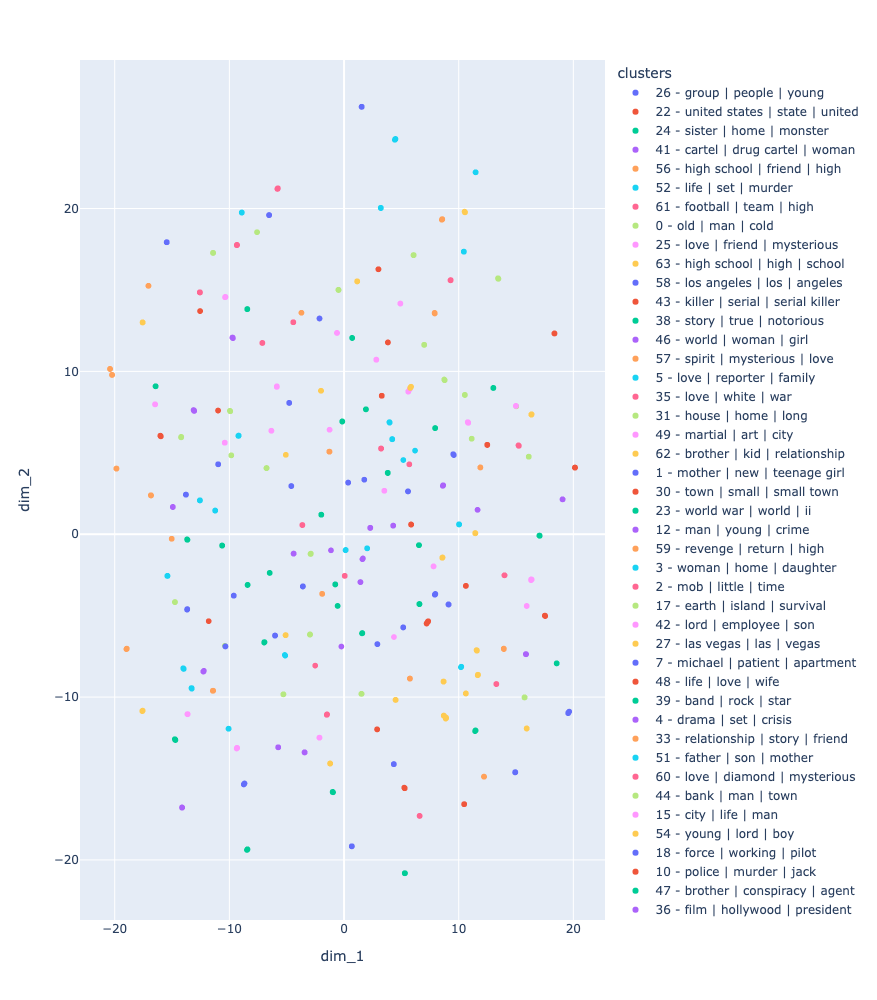

In [8]:
fig = nested.visualize_embeddings(nested_level=2)
fig.show()

In [ ]:
fig = nested.nested_maps(
        size_rule="equal_size",
        map_type="treemap",
        width=1000,
        height=1000,
        query=['vampire'])

fig.show()